In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
glass_df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)
glass_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass_df.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [4]:
header = ['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_type']

glass_df.columns = header

glass_df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id_number   214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
glass_df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass_df.isnull().sum()

Id_number     0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_type    0
dtype: int64

In [8]:
#checking distribution of target variable
glass_df['Glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

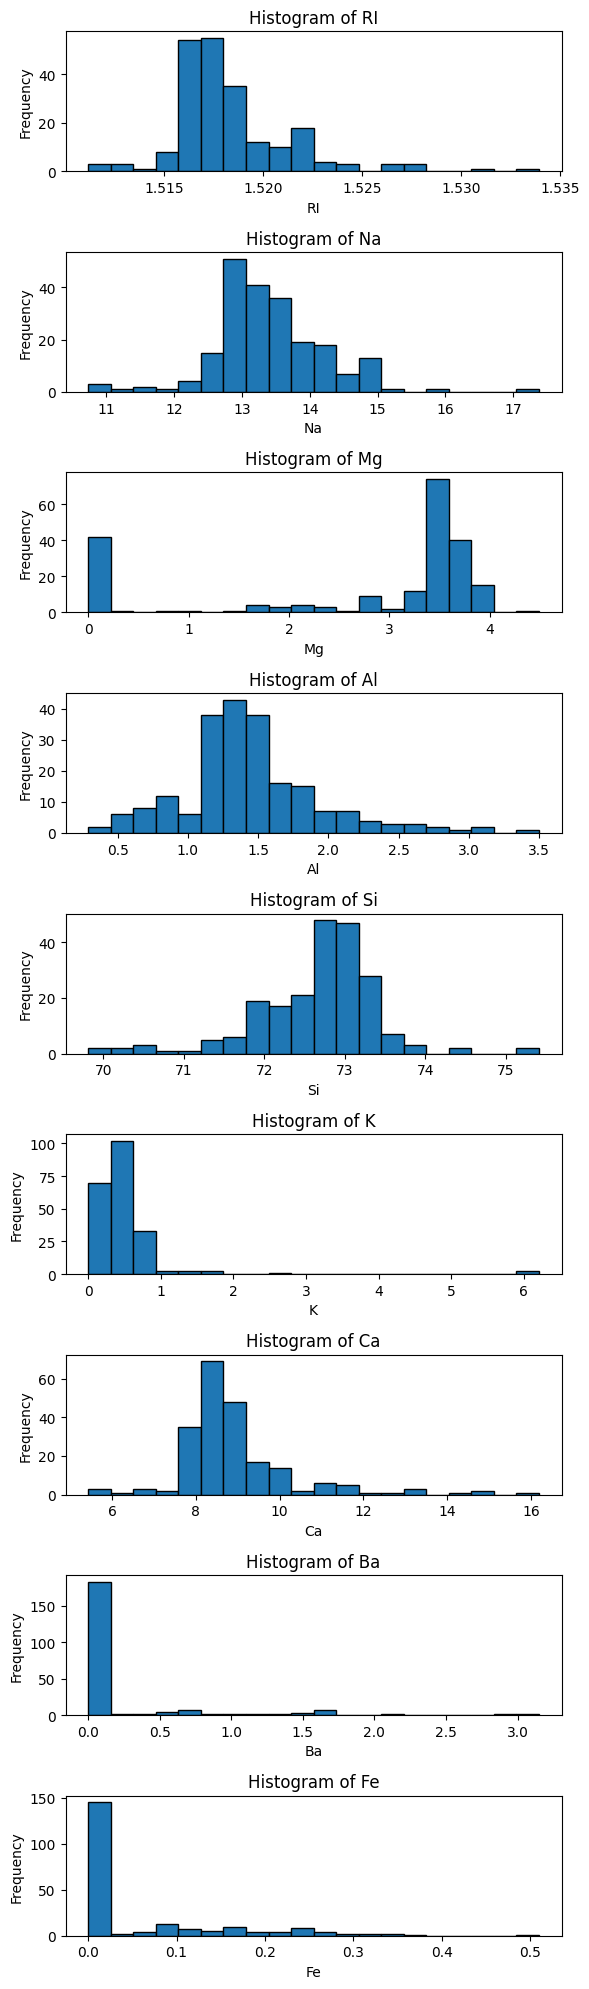

In [9]:
num_feat = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

fig, ax = plt.subplots(nrows=len(num_feat), ncols=1, figsize=(6,20))

for i, j in enumerate(num_feat):
  ax[i].hist(glass_df[j],bins=20,edgecolor='black')
  ax[i].set_title(f'Histogram of {j}')
  ax[i].set_xlabel(j)
  ax[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

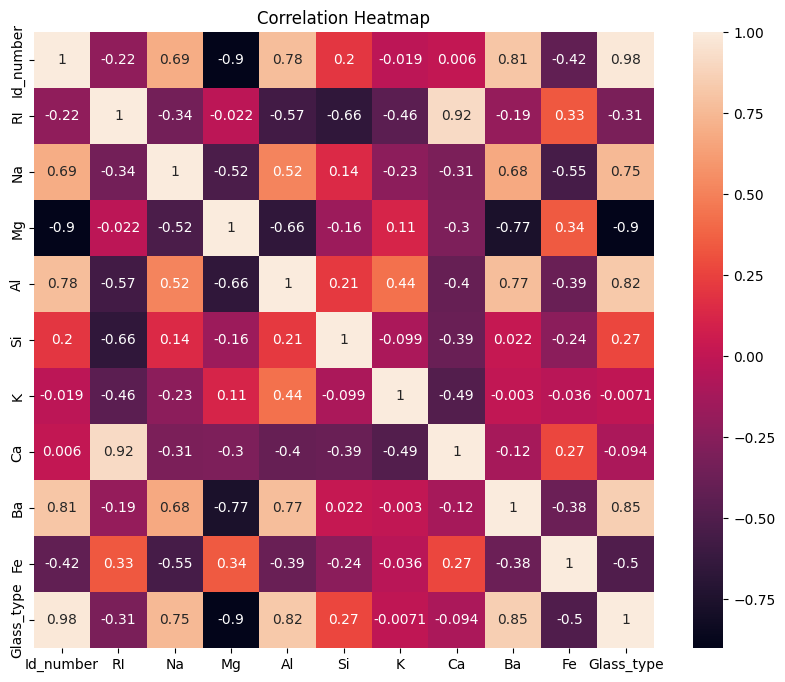

In [11]:
#Correlation Heatmap
glass_corr = glass_df.corr()
plt.figure(figsize=(10,8))
sb.heatmap(glass_corr.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

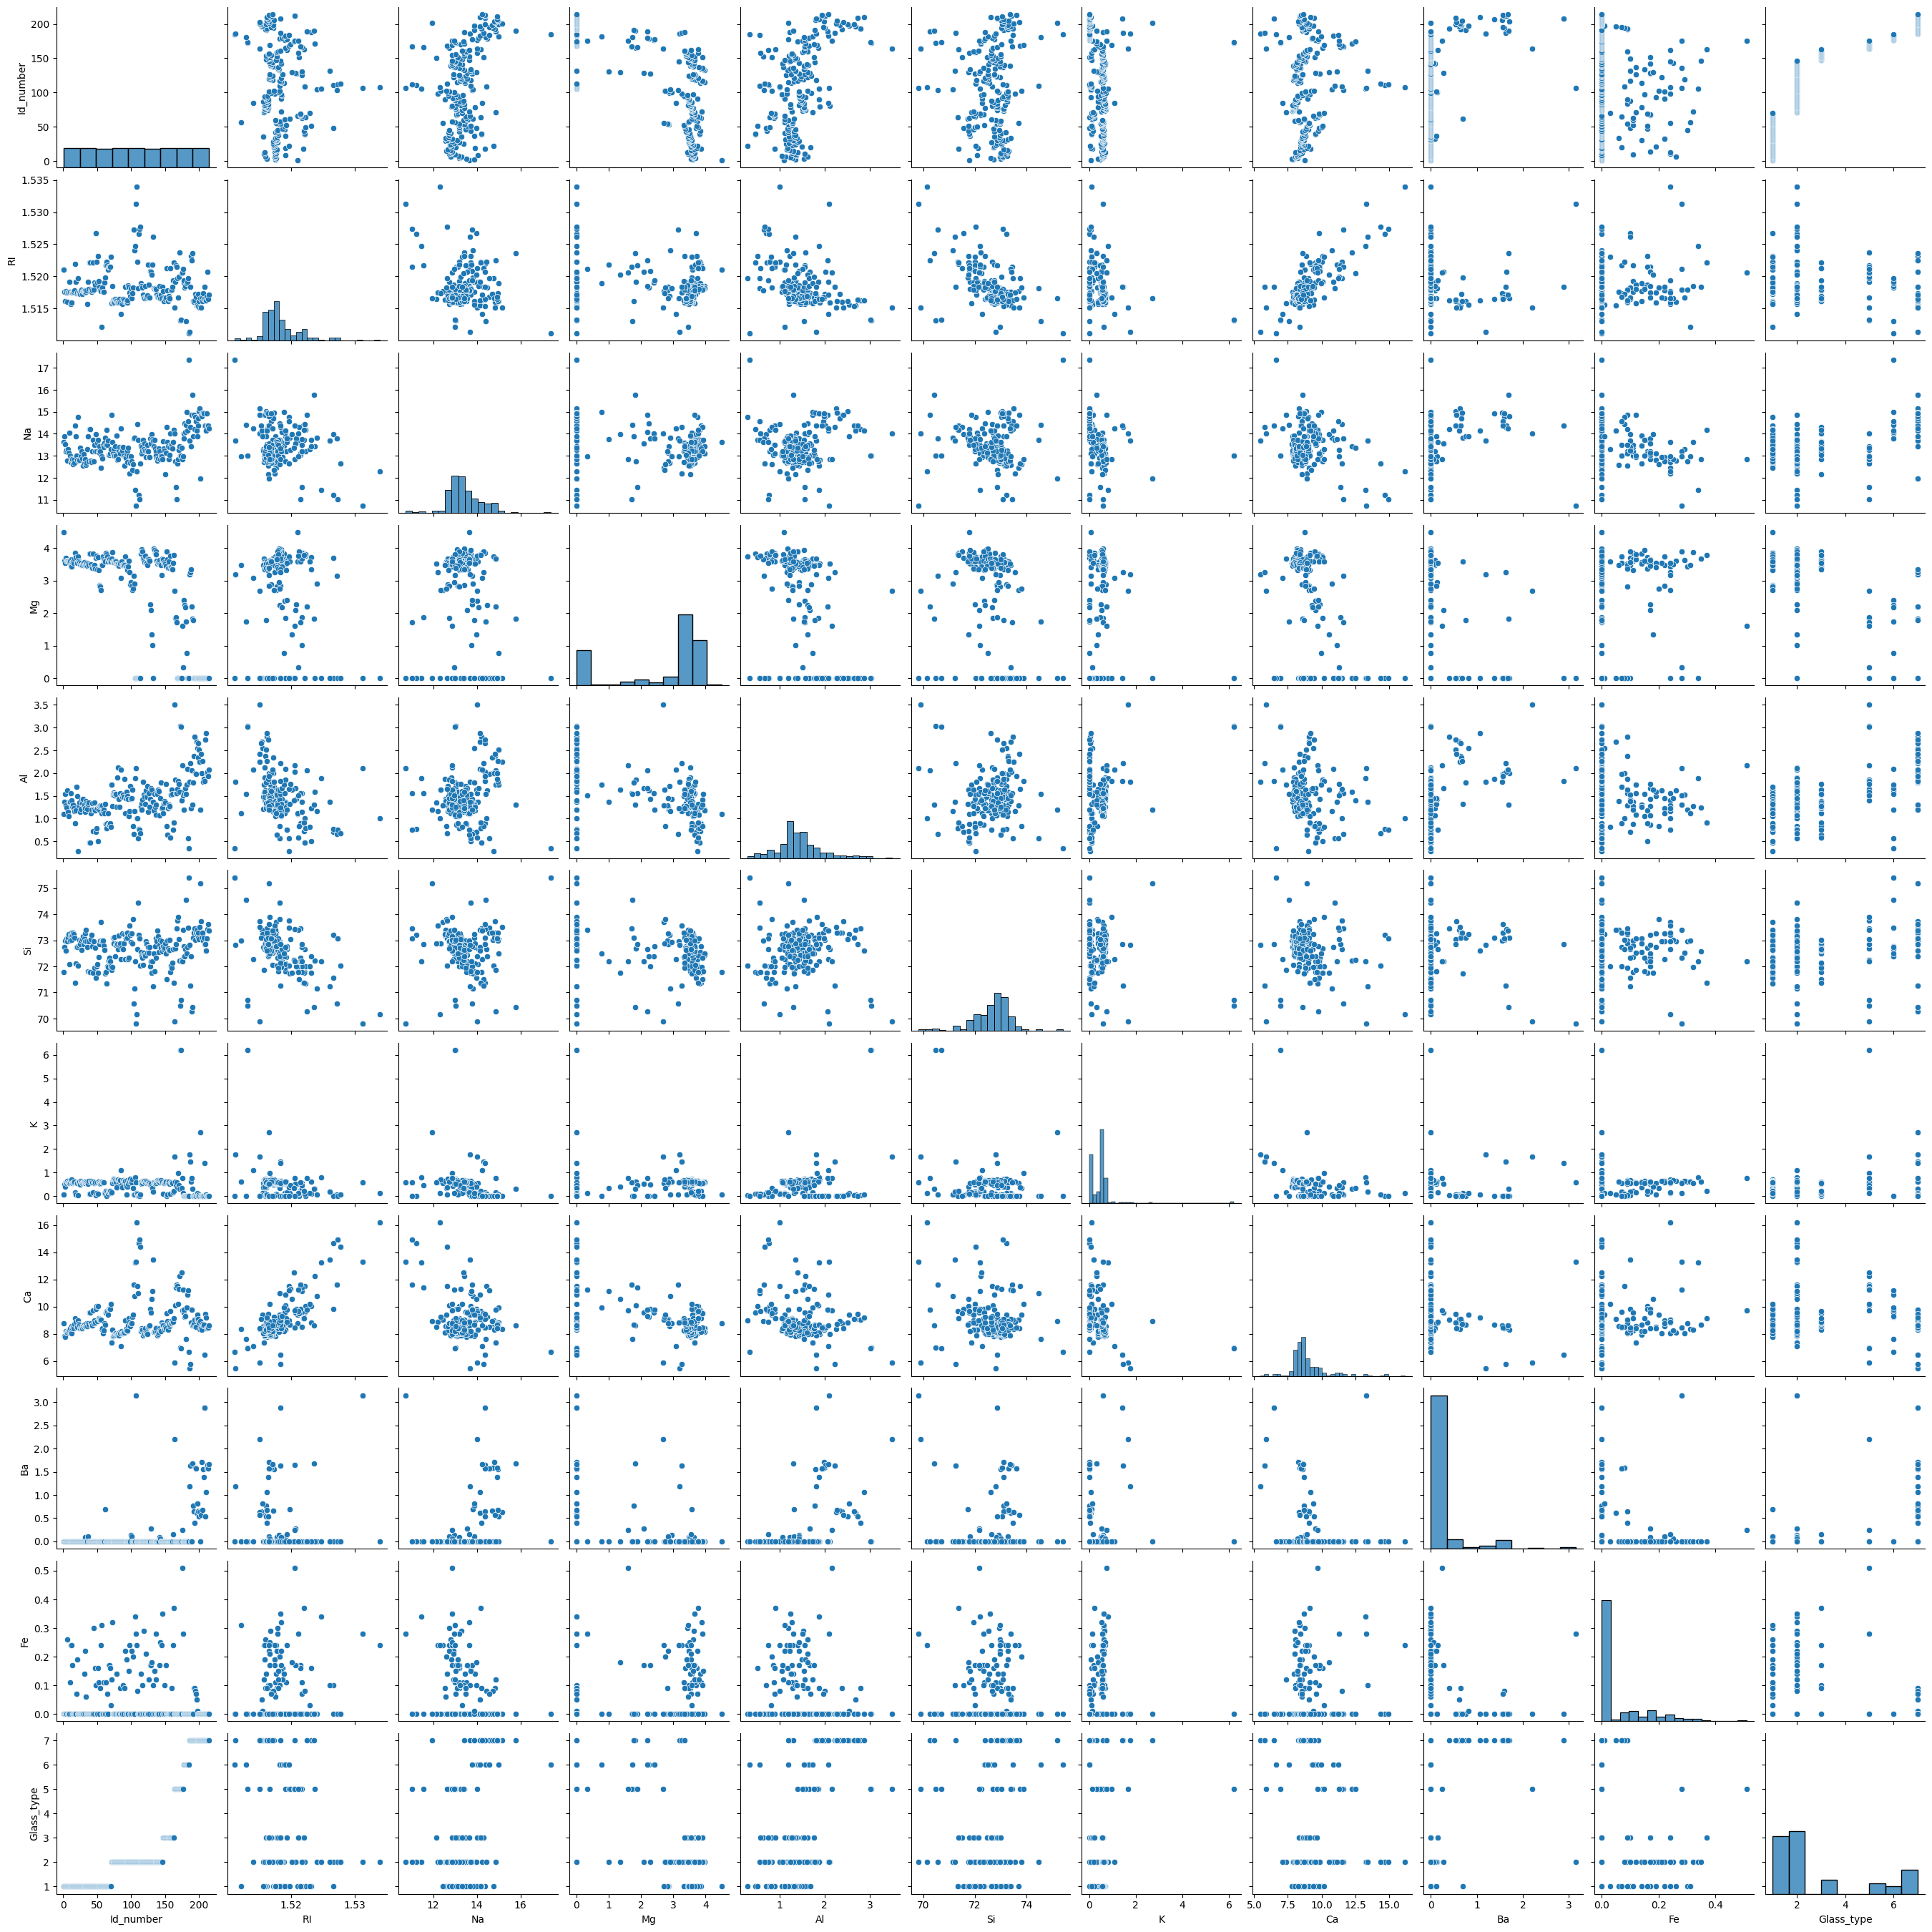

In [12]:
sb.pairplot(glass_df)
plt.show()

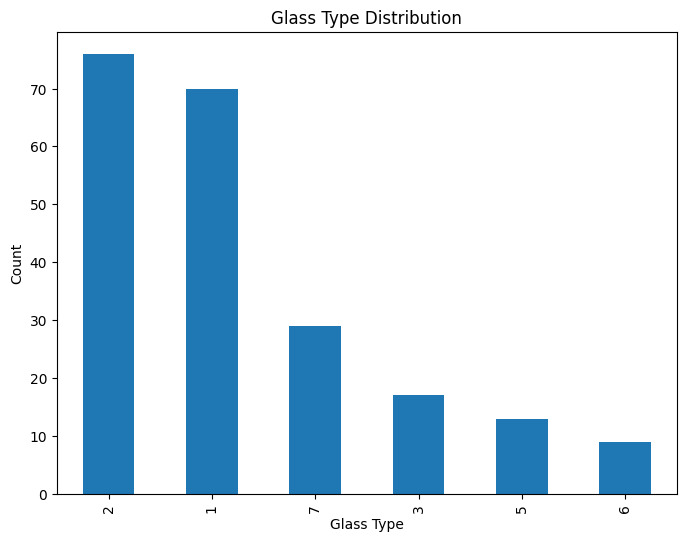

In [13]:
plt.figure(figsize=(8,6))
glass_df['Glass_type'].value_counts().plot(kind='bar')
plt.title('Glass Type Distribution')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

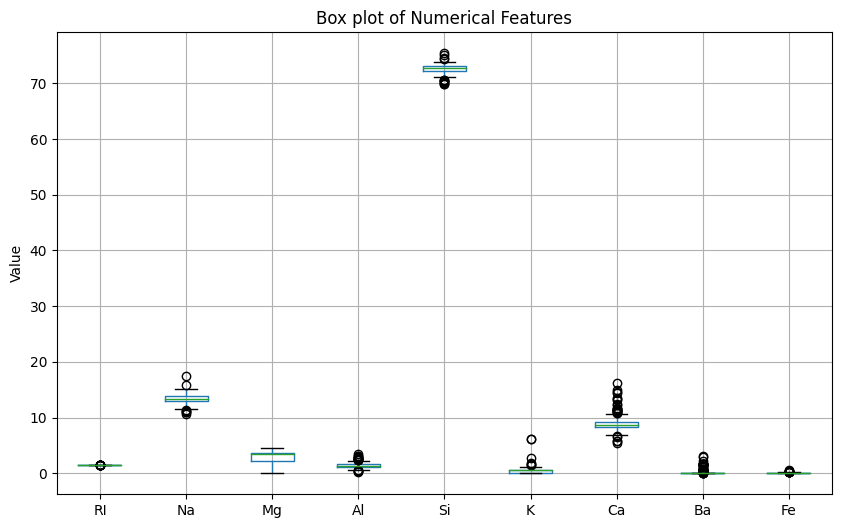

In [14]:
glass_df.boxplot(column=num_feat, figsize=(10,6))
plt.title('Box plot of Numerical Features')
plt.ylabel('Value')
plt.show()

In [15]:
features = glass_df.drop(['Glass_type','Id_number'], axis=1)
target = glass_df['Glass_type']

In [16]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [17]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Glass_type, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
normalizer = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_normal = normalizer.fit_transform(X_train)

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [37]:
from sklearn.metrics import classification_report

rf_prediction = rf.predict(X_test)
gb_prediction = gb.predict(X_test)

rf_report = classification_report(y_test, rf_prediction)
gb_report = classification_report(y_test, gb_prediction)

print("Random Forest Classifier report: \n", rf_report)
print("Gradient Boosting Classifier report: \n", gb_report)

Random Forest Classifier report: 
               precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.92      0.79      0.85        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.88        43
   macro avg       0.94      0.87      0.89        43
weighted avg       0.90      0.88      0.88        43

Gradient Boosting Classifier report: 
               precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

   

In [38]:
corr_matrix = glass_df.corr()

corr_threshold = 0.7

corr_features = set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j]) > corr_threshold:
      col_name = corr_matrix.columns[i]
      corr_features.add(col_name)

df = glass_df.drop(corr_features,axis=1)


In [39]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0


In [40]:
df.drop('Id_number',axis=1)

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0


In [48]:
df.iloc[156].values

array([157.     ,   1.51655,  13.41   ,   3.39   ,   1.28   ,  72.64   ,
         0.52   ,   0.     ,   0.     ])

In [42]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df,target, test_size=0.2, random_state=42)

In [43]:
X_train1_scaled = scaler.fit_transform(X_train1)
X_train1_normal = normalizer.fit_transform(X_train1)

In [44]:
rf1 = RandomForestClassifier()
rf1.fit(X_train1, y_train1)

gb1 = GradientBoostingClassifier()
gb1.fit(X_train1, y_train1)

GradientBoostingClassifier()

In [45]:
rf_prediction1 = rf1.predict(X_test1)
gb_prediction1 = gb1.predict(X_test1)

rf1_report = classification_report(y_test1, rf_prediction)
gb1_report = classification_report(y_test1, gb_prediction)

print("Random Forest Classifier report: \n", rf1_report)
print("Gradient Boosting Classifier report: \n", gb1_report)

Random Forest Classifier report: 
               precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.92      0.79      0.85        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.88        43
   macro avg       0.94      0.87      0.89        43
weighted avg       0.90      0.88      0.88        43

Gradient Boosting Classifier report: 
               precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

   

In [57]:
from sklearn.model_selection import cross_val_score
rf1_scores = cross_val_score(rf1, features, target, cv = 5)
gb1_scores = cross_val_score(gb1, features, target, cv = 5)

print("Random Forest Cross-Validation Score: ", rf1_scores)
print("Gradient Boosting Cross-Validation Score: ", rf1_scores)
print("Mean Score (Random Forest): ", rf1_scores.mean())
print("Mean Score (Gradient Boosting): ", gb1_scores.mean())

Random Forest Cross-Validation Score:  [0.72093023 0.72093023 0.60465116 0.58139535 0.80952381]
Gradient Boosting Cross-Validation Score:  [0.72093023 0.72093023 0.60465116 0.58139535 0.80952381]
Mean Score (Random Forest):  0.6874861572535991
Mean Score (Gradient Boosting):  0.6636766334440753


In [58]:
import joblib

final_model = RandomForestClassifier()
final_model.fit(features, target)

joblib.dump(final_model, 'glass_classification_model.joblib')

['glass_classification_model.joblib']

In [67]:
model = joblib.load('glass_classification_model.joblib')
input_features = [[	1.51711,	14.23,	0.0,	2.08,	73.36,	0.00,	8.62,	1.67,	0.0]]

predicted_glass_type = model.predict(input_features)

glass_labels = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

predicted_glass_label = glass_labels[predicted_glass_type[0]]

print(predicted_glass_label)

headlamps
